# Парсинг данных из группы ВК


**ВК группа:** https://vk.com/hueviygoroskop



In [ ]:
!pip install vk_api

In [ ]:
import vk_api

In [ ]:
def auth_handler():
    key = input("Authentication code: ")
    return key, False

In [ ]:
login = '' # Введите Ваш логин тут
password = '' # введите тут ваш пароль

vk_session = vk_api.VkApi(login, password, auth_handler=auth_handler, app_id=6287487, client_secret="QbYic1K3lEV5kTGiqlq2")
vk_session.auth()

Authentication code: 632663


Тут мы использованы наш логин и пароль,чтобы спарсить данные из ВК

In [ ]:
vk = vk_session.get_api()

In [ ]:
tools = vk_api.VkTools(vk)
wall_id = -170116567

In [ ]:
wall = tools.get_all('wall.get', 4, {'owner_id': wall_id}, limit = 3899)
wall

{'count': 3900,
 'items': [{'inner_type': 'wall_wallpost',
   'ads_easy_promote': {'type': 2,
    'text': 'Что-то пошло не так.',
    'label_text': '',
    'button_text': '',
    'is_ad_not_easy': False},
   'is_pinned': 1,
   'comments': {'can_post': 1, 'count': 46, 'groups_can_post': True},
   'marked_as_ads': 0,
   'compact_attachments_before_cut': 0,
   'hash': 'RLriNRL-wK8JXugvzK49pRffz1i5',
   'type': 'post',
   'attachments': [{'type': 'photo',
     'photo': {'album_id': -7,
      'date': 1648532853,
      'id': 457264516,
      'owner_id': -170116567,
      'access_key': '331f45f7b1699a53e6',
      'post_id': 131777,
      'sizes': [{'height': 130,
        'type': 'm',
        'width': 130,
        'url': 'https://sun1-20.userapi.com/impg/RX1u27g6VRi3PkUVWCFlFJDhHvBONGIVQztF-g/xD5g2kxjnLk.jpg?size=130x130&quality=96&sign=50c6f4f34673b28f1bc1845ca96c15bc&c_uniq_tag=01FPndyo74VEFE-rwgmxo2CkqjXGZk-dxjarzsuO0fk&type=album'},
       {'height': 130,
        'type': 'o',
        'widt

In [ ]:
import pandas as pd

df = pd.DataFrame()
#индекс ID поста
df.index = [post['id'] for post in wall['items']] #индекс в датасэте это id поста
#дата и время
df['date'] = [post['date'] for post in wall['items']] #дата в экспоненициальном формате (1711041900), можно менять при необходимости

#собираем данные о лайках/репостах/просмотрах/комментариях
col = ['likes', 'reposts', 'views', 'comments']
for c in col:
  df[c] = [post[c]['count'] for post in wall['items']]

#собираем информацию по количеству вложений
df['attachments'] = [len(post['attachments']) for post in wall['items']] #количество вложений

#собираем текст из поста
df['text'] = [post['text'] for post in wall['items']]

df.tail(25)

date  likes  reposts   views  comments  attachments  \
166013  1685725380    373       55   15940         4            1   
166006  1685721780    381      112   10144         4            1   
165984  1685718352    305       53   17690         6            1   
165974  1685707381    336      104   12128         5            1   
165971  1685703781    251       71   22023         1            1   
165968  1685701980    492      136   20314         5            1   
165963  1685700457    348       82   15443         6            1   
165950  1685689381   1914      474   79100        10            1   
165926  1685642580   4828      452  172314        24            1   
165920  1685638980    497      127   11788         3            1   
165915  1685635380    326      108   21578         3            1   
165909  1685631781    733      173   25735         5            1   
165907  1685628180    781      534   45766         9            1   
165903  1685624580    426      130   20665         0            1   
165896  1685620981    422      147   19294         3            1   
165893  1685617380    313       80    9667         1            1   
165891  1685613782    519      138   13108         4            1   
165889  1685610183    396      109    9616         4            1   
165884  1685606580    436      116   24651         6            1   
165881  1685602984    502      188   30799         6            1   
165855  1685556180   1571      281   93421         7            1   
165850  1685552580    699      258   35651         2            1   
165845  1685548980    668      129   28997         2            1   
165838  1685545383    587      102   27399         7            1   
165836  1685541780    813      218   29242         6            1   

                    text  
166013       3 июня, лев  
166006      3 июня, дева  
165984      3 июня, весы  
165974  3 июня, Скорпион  
165971   3 июня, Стрелец  
165968   3 июля, Козерог  
165963   3 июня, Водолей  
165950      3 июля, рыбы  
165926      2 июня, овен  
165920     2 июня, телец  
165915  2 июня, близнецы  
165909       2 июня, рак  
165907       2 июня, лев  
165903      2 июня, дева  
165896      2 июня, весы  
165893  2 июня, скорпион  
165891   2 июня, стрелец  
165889   2 июня, козерог  
165884   2 июня, водолей  
165881      2 июня, рыбы  
165855      1 июня, овен  
165850     1 июня, телец  
165845  1 июня, близнецы  
165838       1 июня, рак  
165836       1 июня, лев

# Собираем датафрейм, сортируем-фильтруем, создаем новые признаки

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
df.drop([165855,165850,165845,165838,165836,192930,192929,192927,192922,192912,192909,192885,192931], inplace =True)
#Удаление ненужных дат,чтобы на каждый день было ровно 12 знаков зодиака.Также это удаление вызвано из-за некорректности пакета,потому что при изменении лимита(предельного колиества наблюдей) на одну единицу мы получали данные другого месяца.Так что пришлось вручную удалить.

In [ ]:
df.to_csv('project.csv')
#Превратили спаршенные данные в csv  формат,чтобы далее не возвращаться к vk.api,что упрощает работу.

NameError: name 'df' is not defined

In [ ]:
df_1 = pd.read_csv('project.csv')
df_1

#Считываем наш csv файлик и обозначаем наши данные переменной df_1

Unnamed: 0        date  likes  reposts   views  comments  attachments  \
0         131777  1648532853   3502      295  142682        46            1   
1         192876  1713898980    669      107   12777         3            1   
2         192875  1713895380    438       54    7901         2            1   
3         192872  1713891780    386      127    9472         3            1   
4         192868  1713888180    169       56    4947         2            1   
...          ...         ...    ...      ...     ...       ...          ...   
3882      165893  1685617380    313       80    9667         1            1   
3883      165891  1685613782    519      138   13108         4            1   
3884      165889  1685610183    396      109    9616         4            1   
3885      165884  1685606580    436      116   24651         6            1   
3886      165881  1685602984    502      188   30799         6            1   

                                          text  
0     Что сейчас объединяет все знаки зодиака.  
1                              24 апреля, Овен  
2                             24 апреля, Телец  
3                          24 апреля, Близнецы  
4                               24 апреля, Рак  
...                                        ...  
3882                          2 июня, скорпион  
3883                           2 июня, стрелец  
3884                           2 июня, козерог  
3885                           2 июня, водолей  
3886                              2 июня, рыбы  

[3887 rows x 8 columns]

In [ ]:
df_1.rename(columns = {'date': 'Дата', 'likes' : 'Количество лайков', 'reposts':'Количество репостов', 'views': 'Количество просмотров', 'comments' : 'Количество комментариев', 'attachments':'Количество вложений', 'text': 'Описание поста'}, inplace = True)
#Переименовываем наши столбцы,чтобы далее при составлении анализа было проще ориентироваться,также это улучшило визуализацию данных.

In [ ]:
be = ['Дева','дева','Весы','весы','Скорпион','скорпион','Стрелец','стрелец','Козерог','козерог','Водолей','водолей','Рыбы','рыбы','Овен','овен','Телец','телец','Близнецы','близнецы','Рак','рак','Лев','лев']
df_1['Пост о знаке зодиака'] = df_1['Описание поста'].str.contains('|'.join(be))
df_1
#Смотрим в столбик "Описание поста" и ищем посты,в которых нет названий знаков зодиака,чтобы выявить посты,которые будут мешать нашему анализу в дальнейшем.

Unnamed: 0        Дата  Количество лайков  Количество репостов  \
0         131777  1648532853               3502                  295   
1         192876  1713898980                669                  107   
2         192875  1713895380                438                   54   
3         192872  1713891780                386                  127   
4         192868  1713888180                169                   56   
...          ...         ...                ...                  ...   
3882      165893  1685617380                313                   80   
3883      165891  1685613782                519                  138   
3884      165889  1685610183                396                  109   
3885      165884  1685606580                436                  116   
3886      165881  1685602984                502                  188   

      Количество просмотров  Количество комментариев  Количество вложений  \
0                    142682                       46                    1   
1                     12777                        3                    1   
2                      7901                        2                    1   
3                      9472                        3                    1   
4                      4947                        2                    1   
...                     ...                      ...                  ...   
3882                   9667                        1                    1   
3883                  13108                        4                    1   
3884                   9616                        4                    1   
3885                  24651                        6                    1   
3886                  30799                        6                    1   

                                Описание поста Пост о знаке зодиака  
0     Что сейчас объединяет все знаки зодиака.                False  
1                              24 апреля, Овен                 True  
2                             24 апреля, Телец                 True  
3                          24 апреля, Близнецы                 True  
4                               24 апреля, Рак                 True  
...                                        ...                  ...  
3882                          2 июня, скорпион                 True  
3883                           2 июня, стрелец                 True  
3884                           2 июня, козерог                 True  
3885                           2 июня, водолей                 True  
3886                              2 июня, рыбы                 True  

[3887 rows x 9 columns]

In [ ]:
c_false = df_1[df_1['Пост о знаке зодиака'] == False] #Проверка на наличие рекламных постов или постов,где не фигурирует только один знак зодиака.Это делается,чтобы лучше отфильтровать данные для следующих действий/анализов.

print(c_false)

#Смотрим,какие строчки у нас являются,грубо говоря,вбросами,и проверяем являются они на самом деле вбросами.Мы поняли,что это рекламные посты в нашем паблике.

      Unnamed: 0        Дата  Количество лайков  Количество репостов  \
0         131777  1648532853               3502                  295   
621       188853  1709456777                156                  155   
1249      184902  1704826980                183                  107   
1285      184674  1704570900                  9                    5   
1315      184440  1704376800                  2                    4   
1335      184320  1704224345               1363                  189   
1360      184179  1704056404                269                    2   
1416      183696  1703680827                399                   34   
1458      183269  1703356200                 18                   19   
1624      181954  1702199100                 13                    8   
1680      181600  1701790787                326                   74   
1701      181486  1701674100                  2                    1   
1759      181088  1701254400                  0                 

In [ ]:
df_1 = df_1[df_1['Пост о знаке зодиака'] == True]
df_1.head(20)

#Уничтожаем наши рекламные посты,оставляя посты только со знаками зодиака.


Unnamed: 0        Дата  Количество лайков  Количество репостов  \
1       192876  1713898980                669                  107   
2       192875  1713895380                438                   54   
3       192872  1713891780                386                  127   
4       192868  1713888180                169                   56   
5       192863  1713884580                700                  118   
6       192860  1713880980                425                   57   
7       192856  1713877380                421                   61   
8       192852  1713873780                959                  141   
9       192850  1713870180                382                   94   
10      192847  1713866580                737                  152   
11      192844  1713862980                151                   47   
12      192832  1713861594               2561                  532   
13      192821  1713812580                451                   82   
14      192819  1713808980                433                   55   
15      192817  1713805380                371                   76   
16      192814  1713801780                324                   85   
17      192809  1713798180                240                  129   
18      192808  1713794580                301                   54   
19      192801  1713790980                262                   99   
20      192799  1713787380                206                   40   

    Количество просмотров  Количество комментариев  Количество вложений  \
1                   12777                        3                    1   
2                    7901                        2                    1   
3                    9472                        3                    1   
4                    4947                        2                    1   
5                   10978                        3                    1   
6                    7314                        1                    1   
7                    7051                        0                    1   
8                   12687                        3                    1   
9                    9724                        1                    1   
10                  12188                        2                    1   
11                   7381                        7                    1   
12                  36944                        2                    1   
13                   9554                        1                    1   
14                   8697                        1                    1   
15                   8213                        1                    1   
16                   5627                        1                    1   
17                   8337                        5                    1   
18                   7212                        3                    1   
19                   6782                        4                    1   
20                   7044                        0                    1   

         Описание поста Пост о знаке зодиака  
1       24 апреля, Овен                 True  
2      24 апреля, Телец                 True  
3   24 апреля, Близнецы                 True  
4        24 апреля, Рак                 True  
5        24 апреля, Лев                 True  
6       24 апреля, Дева                 True  
7       24 апреля, Весы                 True  
8   24 апреля, Скорпион                 True  
9    24 апреля, Стрелец                 True  
10   24 апреля, Козерог                 True  
11    24 апреля Водолей                 True  
12      24 апреля, Рыбы                 True  
13      23 апреля, Овен                 True  
14     23 апреля, Телец                 True  
15  23 апреля, Близнецы                 True  
16       23 апреля, Рак                 True  
17       23 апреля, Лев                 True  
18      23 апреля, Дева                 True  
19      23 апреля, Весы                 True  
20  23 апреля, Ск

In [ ]:
pomog = df_1['Описание поста'].str.split(', ', expand=True)
kolvo = pomog.shape[1]
new_column_names = [f'Столбец_{i}' for i in range(1, kolvo + 1)]

pomog.columns = new_column_names

df_1[new_column_names] = pomog

df_1 = df_1.drop(columns = ['Столбец_3','Столбец_4','Столбец_5','Столбец_6','Столбец_7','Столбец_8','Столбец_9','Столбец_10','Столбец_11','Столбец_12','Столбец_13',	'Столбец_14',	'Столбец_15',	'Столбец_16',	'Столбец_17',	'Столбец_18',	'Столбец_19',	'Столбец_20',	'Столбец_21',	'Столбец_22'])
df_1.head(25)

#В этом шаге мы увидели закономерность у постов.В столбике "Описание поста" авторы всегда писали дату,а потом через ", " писали знак зодиак.Когда мы попытались отделить таким образом дату и знак зодиак,у нас ввышла ошибка.Поэтому нам пришлось разделить столбик "Описание поста" на больше,чем два новых столбика.Количество новых столбиков=запрашиваемые столбики от таблицы.
#После того как мы разделили столбик "Описание поста" на необходимое количество столбиков,то мы поняли,что все новые столбики,кроме первых двух,состоят полностью из пустых ячеек.Поэтому мы решили удалить ненужные нам столбики: в них отсутствовали данные.


<ipython-input-222-375d54de1180>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[new_column_names] = pomog
<ipython-input-222-375d54de1180>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[new_column_names] = pomog
<ipython-input-222-375d54de1180>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Unnamed: 0        Дата  Количество лайков  Количество репостов  \
1       192876  1713898980                669                  107   
2       192875  1713895380                438                   54   
3       192872  1713891780                386                  127   
4       192868  1713888180                169                   56   
5       192863  1713884580                700                  118   
6       192860  1713880980                425                   57   
7       192856  1713877380                421                   61   
8       192852  1713873780                959                  141   
9       192850  1713870180                382                   94   
10      192847  1713866580                737                  152   
11      192844  1713862980                151                   47   
12      192832  1713861594               2561                  532   
13      192821  1713812580                451                   82   
14      192819  1713808980                433                   55   
15      192817  1713805380                371                   76   
16      192814  1713801780                324                   85   
17      192809  1713798180                240                  129   
18      192808  1713794580                301                   54   
19      192801  1713790980                262                   99   
20      192799  1713787380                206                   40   
21      192796  1713783780               1407                  273   
22      192794  1713780180                295                   78   
23      192793  1713776580               1915                  414   
24      192780  1713774820                391                  113   
25      192756  1713722580                309                   70   

    Количество просмотров  Количество комментариев  Количество вложений  \
1                   12777                        3                    1   
2                    7901                        2                    1   
3                    9472                        3                    1   
4                    4947                        2                    1   
5                   10978                        3                    1   
6                    7314                        1                    1   
7                    7051                        0                    1   
8                   12687                        3                    1   
9                    9724                        1                    1   
10                  12188                        2                    1   
11                   7381                        7                    1   
12                  36944                        2                    1   
13                   9554                        1                    1   
14                   8697                        1                    1   
15                   8213                        1                    1   
16                   5627                        1                    1   
17                   8337                        5                    1   
18                   7212                        3                    1   
19                   6782                        4                    1   
20                   7044                        0                    1   
21                  23638                        6                    1   
22                   6804                        1                    1   
23                  24008                        2                    1   
24                  11078                        0                    1   
25                   7603                       15                    1   

         Описание поста Пост о знаке зодиака          Столбец_1 Столбец_2  
1       24 апреля, Овен                 True          24 апреля      Овен  
2      24 апреля, Телец                 True          24 апреля     Телец  
3   

In [ ]:
df_1.rename(columns = {'Столбец_1': 'duch', 'Столбец_2': 'Знак зодиака'},inplace = True)
df_1
#Тут мы просто меняем название столбиков,чтобы было легче работать и визуально понятнее.

Unnamed: 0        Дата  Количество лайков  Количество репостов  \
1         192876  1713898980                669                  107   
2         192875  1713895380                438                   54   
3         192872  1713891780                386                  127   
4         192868  1713888180                169                   56   
5         192863  1713884580                700                  118   
...          ...         ...                ...                  ...   
3882      165893  1685617380                313                   80   
3883      165891  1685613782                519                  138   
3884      165889  1685610183                396                  109   
3885      165884  1685606580                436                  116   
3886      165881  1685602984                502                  188   

      Количество просмотров  Количество комментариев  Количество вложений  \
1                     12777                        3                    1   
2                      7901                        2                    1   
3                      9472                        3                    1   
4                      4947                        2                    1   
5                     10978                        3                    1   
...                     ...                      ...                  ...   
3882                   9667                        1                    1   
3883                  13108                        4                    1   
3884                   9616                        4                    1   
3885                  24651                        6                    1   
3886                  30799                        6                    1   

           Описание поста Пост о знаке зодиака       duch Знак зодиака  
1         24 апреля, Овен                 True  24 апреля         Овен  
2        24 апреля, Телец                 True  24 апреля        Телец  
3     24 апреля, Близнецы                 True  24 апреля     Близнецы  
4          24 апреля, Рак                 True  24 апреля          Рак  
5          24 апреля, Лев                 True  24 апреля          Лев  
...                   ...                  ...        ...          ...  
3882     2 июня, скорпион                 True     2 июня     скорпион  
3883      2 июня, стрелец                 True     2 июня      стрелец  
3884      2 июня, козерог                 True     2 июня      козерог  
3885      2 июня, водолей                 True     2 июня      водолей  
3886         2 июня, рыбы                 True     2 июня         рыбы  

[3865 rows x 11 columns]

In [ ]:
c_none = df_1[df_1['Знак зодиака'].isna()]
print(c_none)

#Проверяем на наличие пропусков в столбике "Знак зодиака" и замечаем закономерность,что пропусти есть у постов о Водолеях,так как у них разделение между датой и знаком зодиака = " ",а не ", ".Также видим,что есть один пост не про Водолеев,а про Раков.


      Unnamed: 0        Дата  Количество лайков  Количество репостов  \
11        192844  1713862980                151                   47   
23        192793  1713776580               1915                  414   
35        192725  1713686580               1239                  214   
47        192688  1713603780                494                   72   
59        192644  1713517380               1350                  201   
71        192526  1713430980               1651                  353   
83        192422  1713344580                270                   57   
95        192351  1713265380                397                   82   
107       192272  1713178980                457                  132   
119       192216  1713081780                326                   61   
131       192161  1712998980               8290                 1935   
143       192113  1712912582                428                   59   
155       191983  1712826180                399                 

In [ ]:
df_1.loc[1216]
#Мы удостоверились,что этот пост не рекламный,а и вправду содержит информацию про знак зодиака(мы тут также смотрели на df_1.loc[1215],df_1.loc[1217],чтобы понять отсутсвует ли на 13 января пост про Раков)

Unnamed: 0                                                            185078
Дата                                                              1705071780
Количество лайков                                                         78
Количество репостов                                                       70
Количество просмотров                                                   8984
Количество комментариев                                                    1
Количество вложений                                                        1
Описание поста             13 января \n \nРаки пережив эту неделю до выхо...
Пост о знаке зодиака                                                    True
duch                       13 января \n \nРаки пережив эту неделю до выхо...
Знак зодиака                                                            None
Name: 1216, dtype: object

In [ ]:
df_1['Знак зодиака'] = df_1['Знак зодиака'].fillna('Водолей')
df_1.loc[1216, 'Знак зодиака'] = 'Рак'
df_1.loc[1216]
#Здесь мы заменили все пустые значения в столбике "Знак зодиака" на Водолей(так как,кроме одного,все остальные ячейки должно были быть про Водолеев),и присвоили новое значение df_1.loc[1216] = Рак

Unnamed: 0                                                            185078
Дата                                                              1705071780
Количество лайков                                                         78
Количество репостов                                                       70
Количество просмотров                                                   8984
Количество комментариев                                                    1
Количество вложений                                                        1
Описание поста             13 января \n \nРаки пережив эту неделю до выхо...
Пост о знаке зодиака                                                    True
duch                       13 января \n \nРаки пережив эту неделю до выхо...
Знак зодиака                                                             Рак
Name: 1216, dtype: object

In [ ]:
df_1 = df_1.drop(columns = ['duch','Unnamed: 0','Пост о знаке зодиака'])
df_1.head(13)
#Удалили ненужные нам столбцы,которые были ранее использованы для фильтрации данных.Потому что они в дальнейшем анализе данных не понадобятся

Дата  Количество лайков  Количество репостов  Количество просмотров  \
1   1713898980                669                  107                  12777   
2   1713895380                438                   54                   7901   
3   1713891780                386                  127                   9472   
4   1713888180                169                   56                   4947   
5   1713884580                700                  118                  10978   
6   1713880980                425                   57                   7314   
7   1713877380                421                   61                   7051   
8   1713873780                959                  141                  12687   
9   1713870180                382                   94                   9724   
10  1713866580                737                  152                  12188   
11  1713862980                151                   47                   7381   
12  1713861594               2561                  532                  36944   
13  1713812580                451                   82                   9554   

    Количество комментариев  Количество вложений       Описание поста  \
1                         3                    1      24 апреля, Овен   
2                         2                    1     24 апреля, Телец   
3                         3                    1  24 апреля, Близнецы   
4                         2                    1       24 апреля, Рак   
5                         3                    1       24 апреля, Лев   
6                         1                    1      24 апреля, Дева   
7                         0                    1      24 апреля, Весы   
8                         3                    1  24 апреля, Скорпион   
9                         1                    1   24 апреля, Стрелец   
10                        2                    1   24 апреля, Козерог   
11                        7                    1    24 апреля Водолей   
12                        2                    1      24 апреля, Рыбы   
13                        1                    1      23 апреля, Овен   

   Знак зодиака  
1          Овен  
2         Телец  
3      Близнецы  
4           Рак  
5           Лев  
6          Дева  
7          Весы  
8      Скорпион  
9       Стрелец  
10      Козерог  
11      Водолей  
12         Рыбы  
13         Овен

In [ ]:
df_1.shape
df_1
#Проверили соотвествует ли размер нашей таблица необходимому после удаления столбцов.

Дата  Количество лайков  Количество репостов  \
1     1713898980                669                  107   
2     1713895380                438                   54   
3     1713891780                386                  127   
4     1713888180                169                   56   
5     1713884580                700                  118   
...          ...                ...                  ...   
3882  1685617380                313                   80   
3883  1685613782                519                  138   
3884  1685610183                396                  109   
3885  1685606580                436                  116   
3886  1685602984                502                  188   

      Количество просмотров  Количество комментариев  Количество вложений  \
1                     12777                        3                    1   
2                      7901                        2                    1   
3                      9472                        3                    1   
4                      4947                        2                    1   
5                     10978                        3                    1   
...                     ...                      ...                  ...   
3882                   9667                        1                    1   
3883                  13108                        4                    1   
3884                   9616                        4                    1   
3885                  24651                        6                    1   
3886                  30799                        6                    1   

           Описание поста Знак зодиака  
1         24 апреля, Овен         Овен  
2        24 апреля, Телец        Телец  
3     24 апреля, Близнецы     Близнецы  
4          24 апреля, Рак          Рак  
5          24 апреля, Лев          Лев  
...                   ...          ...  
3882     2 июня, скорпион     скорпион  
3883      2 июня, стрелец      стрелец  
3884      2 июня, козерог      козерог  
3885      2 июня, водолей      водолей  
3886         2 июня, рыбы         рыбы  

[3865 rows x 8 columns]

In [ ]:
from datetime import date

def convert_time_to_date(jojo):
  con_date = date.fromtimestamp(jojo)
  return con_date

df_1['Дата'] = df_1['Дата'].apply(convert_time_to_date)
df_1

#Здесь мы применили функцию,чтобы превтатить значения в столбике 'Дата' в удобные и понятные для нас.

Дата  Количество лайков  Количество репостов  \
1     2024-04-23                669                  107   
2     2024-04-23                438                   54   
3     2024-04-23                386                  127   
4     2024-04-23                169                   56   
5     2024-04-23                700                  118   
...          ...                ...                  ...   
3882  2023-06-01                313                   80   
3883  2023-06-01                519                  138   
3884  2023-06-01                396                  109   
3885  2023-06-01                436                  116   
3886  2023-06-01                502                  188   

      Количество просмотров  Количество комментариев  Количество вложений  \
1                     12777                        3                    1   
2                      7901                        2                    1   
3                      9472                        3                    1   
4                      4947                        2                    1   
5                     10978                        3                    1   
...                     ...                      ...                  ...   
3882                   9667                        1                    1   
3883                  13108                        4                    1   
3884                   9616                        4                    1   
3885                  24651                        6                    1   
3886                  30799                        6                    1   

           Описание поста Знак зодиака  
1         24 апреля, Овен         Овен  
2        24 апреля, Телец        Телец  
3     24 апреля, Близнецы     Близнецы  
4          24 апреля, Рак          Рак  
5          24 апреля, Лев          Лев  
...                   ...          ...  
3882     2 июня, скорпион     скорпион  
3883      2 июня, стрелец      стрелец  
3884      2 июня, козерог      козерог  
3885      2 июня, водолей      водолей  
3886         2 июня, рыбы         рыбы  

[3865 rows x 8 columns]

In [ ]:
def up_letter(let):
  up = let.title()
  return up

df_1['Знак зодиака'] = df_1['Знак зодиака'].apply(up_letter)
df_1

#В нашем столбике 'Знак зодиака' некоторые знаки писались с прописной буквы,а кто-то с заглавной.Чтобы при дальнейшем анализе знаков зодиака не было ошибок,мы применили функцию,которая делает первую букву слова заглавной.

Дата  Количество лайков  Количество репостов  \
1     2024-04-23                669                  107   
2     2024-04-23                438                   54   
3     2024-04-23                386                  127   
4     2024-04-23                169                   56   
5     2024-04-23                700                  118   
...          ...                ...                  ...   
3882  2023-06-01                313                   80   
3883  2023-06-01                519                  138   
3884  2023-06-01                396                  109   
3885  2023-06-01                436                  116   
3886  2023-06-01                502                  188   

      Количество просмотров  Количество комментариев  Количество вложений  \
1                     12777                        3                    1   
2                      7901                        2                    1   
3                      9472                        3                    1   
4                      4947                        2                    1   
5                     10978                        3                    1   
...                     ...                      ...                  ...   
3882                   9667                        1                    1   
3883                  13108                        4                    1   
3884                   9616                        4                    1   
3885                  24651                        6                    1   
3886                  30799                        6                    1   

           Описание поста Знак зодиака  
1         24 апреля, Овен         Овен  
2        24 апреля, Телец        Телец  
3     24 апреля, Близнецы     Близнецы  
4          24 апреля, Рак          Рак  
5          24 апреля, Лев          Лев  
...                   ...          ...  
3882     2 июня, скорпион     Скорпион  
3883      2 июня, стрелец      Стрелец  
3884      2 июня, козерог      Козерог  
3885      2 июня, водолей      Водолей  
3886         2 июня, рыбы         Рыбы  

[3865 rows x 8 columns]

In [ ]:
df_1['Стихии'] = ['Огонь' if znak in ['Овен','Лев','Стрелец'] else 'Земля' if znak in ['Телец','Дева','Козерог'] else 'Воздух' if znak in ['Близнецы','Весы','Водолей'] else 'Вода' if znak in ['Рак','Скорпион','Рыбы'] else 'loser' for znak in df_1['Знак зодиака']]
df_1.head(13)
#На этом шаге мы сделали классификацию по стихиям,присвоили каждому знаку зодиака его стихию.

Дата  Количество лайков  Количество репостов  Количество просмотров  \
1   2024-04-23                669                  107                  12777   
2   2024-04-23                438                   54                   7901   
3   2024-04-23                386                  127                   9472   
4   2024-04-23                169                   56                   4947   
5   2024-04-23                700                  118                  10978   
6   2024-04-23                425                   57                   7314   
7   2024-04-23                421                   61                   7051   
8   2024-04-23                959                  141                  12687   
9   2024-04-23                382                   94                   9724   
10  2024-04-23                737                  152                  12188   
11  2024-04-23                151                   47                   7381   
12  2024-04-23               2561                  532                  36944   
13  2024-04-22                451                   82                   9554   

    Количество комментариев  Количество вложений       Описание поста  \
1                         3                    1      24 апреля, Овен   
2                         2                    1     24 апреля, Телец   
3                         3                    1  24 апреля, Близнецы   
4                         2                    1       24 апреля, Рак   
5                         3                    1       24 апреля, Лев   
6                         1                    1      24 апреля, Дева   
7                         0                    1      24 апреля, Весы   
8                         3                    1  24 апреля, Скорпион   
9                         1                    1   24 апреля, Стрелец   
10                        2                    1   24 апреля, Козерог   
11                        7                    1    24 апреля Водолей   
12                        2                    1      24 апреля, Рыбы   
13                        1                    1      23 апреля, Овен   

   Знак зодиака  Стихии  
1          Овен   Огонь  
2         Телец   Земля  
3      Близнецы  Воздух  
4           Рак    Вода  
5           Лев   Огонь  
6          Дева   Земля  
7          Весы  Воздух  
8      Скорпион    Вода  
9       Стрелец   Огонь  
10      Козерог   Земля  
11      Водолей  Воздух  
12         Рыбы    Вода  
13         Овен   Огонь

In [ ]:
#Тут мы ещё раз решили проверить на наличие рекламных постов/постов,неотносящихся к нашему анализу
poly = df_1[df_1['Стихии'] == 'loser']
print(poly)

            Дата  Количество лайков  Количество репостов  \
2429  2023-10-03                482                  203   
2825  2023-08-30                830                  191   
2867  2023-08-26                229                   37   
3210  2023-07-29                  9                    0   
3242  2023-07-26                  1                    1   
3505  2023-07-04                982                  228   

      Количество просмотров  Количество комментариев  Количество вложений  \
2429                  19051                        4                    1   
2825                  26499                        5                    1   
2867                   8135                        4                    1   
3210                   8022                        1                   10   
3242                   7729                        0                    2   
3505                  23129                       11                    1   

                                       

In [ ]:
df_1.loc[2429, 'Знак зодиака'] = 'Овен'
df_1.loc[2825, 'Знак зодиака'] = 'Рыбы'
df_1.loc[2867, 'Знак зодиака'] = 'Дева'
df_1.loc[3505, 'Знак зодиака'] = 'Лев'

#Обнаружили вбросы и знаки зодиаки,которые были закинуты в столбик "Знак зодиака" с ошибками из-за админов группы,которые создают посты.Точечное менее значение наших знаков зодиака.

In [ ]:
df_1['Стихии'] = ['Огонь' if znak in ['Овен','Лев','Стрелец'] else 'Земля' if znak in ['Телец','Дева','Козерог'] else 'Воздух' if znak in ['Близнецы','Весы','Водолей'] else 'Вода' if znak in ['Рак','Скорпион','Рыбы'] else 'loser' for znak in df_1['Знак зодиака']]
df_1.head(13)
#Снова проводим классификацию на стихии,чтобы учлись наши точечные изменения.

Дата  Количество лайков  Количество репостов  Количество просмотров  \
1   2024-04-23                669                  107                  12777   
2   2024-04-23                438                   54                   7901   
3   2024-04-23                386                  127                   9472   
4   2024-04-23                169                   56                   4947   
5   2024-04-23                700                  118                  10978   
6   2024-04-23                425                   57                   7314   
7   2024-04-23                421                   61                   7051   
8   2024-04-23                959                  141                  12687   
9   2024-04-23                382                   94                   9724   
10  2024-04-23                737                  152                  12188   
11  2024-04-23                151                   47                   7381   
12  2024-04-23               2561                  532                  36944   
13  2024-04-22                451                   82                   9554   

    Количество комментариев  Количество вложений       Описание поста  \
1                         3                    1      24 апреля, Овен   
2                         2                    1     24 апреля, Телец   
3                         3                    1  24 апреля, Близнецы   
4                         2                    1       24 апреля, Рак   
5                         3                    1       24 апреля, Лев   
6                         1                    1      24 апреля, Дева   
7                         0                    1      24 апреля, Весы   
8                         3                    1  24 апреля, Скорпион   
9                         1                    1   24 апреля, Стрелец   
10                        2                    1   24 апреля, Козерог   
11                        7                    1    24 апреля Водолей   
12                        2                    1      24 апреля, Рыбы   
13                        1                    1      23 апреля, Овен   

   Знак зодиака  Стихии  
1          Овен   Огонь  
2         Телец   Земля  
3      Близнецы  Воздух  
4           Рак    Вода  
5           Лев   Огонь  
6          Дева   Земля  
7          Весы  Воздух  
8      Скорпион    Вода  
9       Стрелец   Огонь  
10      Козерог   Земля  
11      Водолей  Воздух  
12         Рыбы    Вода  
13         Овен   Огонь

In [ ]:
df_1 = df_1[df_1['Стихии'] != 'loser']
df_1
#Удаляем неверных/рекламные посты.

Дата  Количество лайков  Количество репостов  \
1     2024-04-23                669                  107   
2     2024-04-23                438                   54   
3     2024-04-23                386                  127   
4     2024-04-23                169                   56   
5     2024-04-23                700                  118   
...          ...                ...                  ...   
3882  2023-06-01                313                   80   
3883  2023-06-01                519                  138   
3884  2023-06-01                396                  109   
3885  2023-06-01                436                  116   
3886  2023-06-01                502                  188   

      Количество просмотров  Количество комментариев  Количество вложений  \
1                     12777                        3                    1   
2                      7901                        2                    1   
3                      9472                        3                    1   
4                      4947                        2                    1   
5                     10978                        3                    1   
...                     ...                      ...                  ...   
3882                   9667                        1                    1   
3883                  13108                        4                    1   
3884                   9616                        4                    1   
3885                  24651                        6                    1   
3886                  30799                        6                    1   

           Описание поста Знак зодиака  Стихии  
1         24 апреля, Овен         Овен   Огонь  
2        24 апреля, Телец        Телец   Земля  
3     24 апреля, Близнецы     Близнецы  Воздух  
4          24 апреля, Рак          Рак    Вода  
5          24 апреля, Лев          Лев   Огонь  
...                   ...          ...     ...  
3882     2 июня, скорпион     Скорпион    Вода  
3883      2 июня, стрелец      Стрелец   Огонь  
3884      2 июня, козерог      Козерог   Земля  
3885      2 июня, водолей      Водолей  Воздух  
3886         2 июня, рыбы         Рыбы    Вода  

[3863 rows x 9 columns]

In [ ]:
df_1.isna().sum()
#После визуальных штрихов и причёсывания данных,посмотрели имеются пропуски или нет,чтоб не было вбросов.

Дата                       0
Количество лайков          0
Количество репостов        0
Количество просмотров      0
Количество комментариев    0
Количество вложений        0
Описание поста             0
Знак зодиака               0
Стихии                     0
dtype: int64

In [ ]:
df_1 = df_1.to_csv('project(filter).csv')
#Сохраняем в csv формат,чтобы заново всю нашу работу по визуалиции,причёсывания и классификации не запускать и не тратить время.

# ОТКРЫВАЕМ ЧИСТЕНЬКИЙ ФАЙЛ

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from datetime import datetime

In [ ]:
df_2 = pd.read_csv('project(filter).csv')
df_2

Unnamed: 0        Дата  Количество лайков  Количество репостов  \
0              1  2024-04-23                669                  107   
1              2  2024-04-23                438                   54   
2              3  2024-04-23                386                  127   
3              4  2024-04-23                169                   56   
4              5  2024-04-23                700                  118   
...          ...         ...                ...                  ...   
3858        3882  2023-06-01                313                   80   
3859        3883  2023-06-01                519                  138   
3860        3884  2023-06-01                396                  109   
3861        3885  2023-06-01                436                  116   
3862        3886  2023-06-01                502                  188   

      Количество просмотров  Количество комментариев  Количество вложений  \
0                     12777                        3                    1   
1                      7901                        2                    1   
2                      9472                        3                    1   
3                      4947                        2                    1   
4                     10978                        3                    1   
...                     ...                      ...                  ...   
3858                   9667                        1                    1   
3859                  13108                        4                    1   
3860                   9616                        4                    1   
3861                  24651                        6                    1   
3862                  30799                        6                    1   

           Описание поста Знак зодиака  Стихии  
0         24 апреля, Овен         Овен   Огонь  
1        24 апреля, Телец        Телец   Земля  
2     24 апреля, Близнецы     Близнецы  Воздух  
3          24 апреля, Рак          Рак    Вода  
4          24 апреля, Лев          Лев   Огонь  
...                   ...          ...     ...  
3858     2 июня, скорпион     Скорпион    Вода  
3859      2 июня, стрелец      Стрелец   Огонь  
3860      2 июня, козерог      Козерог   Земля  
3861      2 июня, водолей      Водолей  Воздух  
3862         2 июня, рыбы         Рыбы    Вода  

[3863 rows x 10 columns]

# Создание нового признака

Мы решили создать новый категориальный признак: является ли день рабочим, то есть не выходным и не праздником. Мы думаем, что если день не рабочий, это может повлиять на отклик на посты.

In [ ]:
holidays = ['2023-06-10', '2023-06-11', '2023-06-12', '2023-11-04', '2023-11-05', '2023-11-06', '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-06', '2024-01-07', '2024-01-08', '2024-02-23', '2024-02-24', '2024-02-25', '2024-03-08', '2024-03-09', '2024-03-10']


In [ ]:
# Функция для определения праздничного дня или выходного дня
def is_holiday_or_weekend(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    if date_str in holidays:     # Проверяем, является ли день праздничным
        return True
    if date.weekday() >= 5:      # Проверяем, является ли день субботой или воскресеньем
        return True
    return False

# Применяем функцию к столбцу 'Дата' и создаем новый столбец
df_2['Рабочий_день'] = df_2['Дата'].apply(lambda x: '0' if is_holiday_or_weekend(x) else '1')

df_2.head()

# Промежуточные махинации с датафреймом (для визуализации)

In [ ]:
df_2 = df_2.drop(columns = ['Unnamed: 0'])
df_2
# убираем лишнюю колонку

Дата  Количество лайков  Количество репостов  \
0     2024-04-23                669                  107   
1     2024-04-23                438                   54   
2     2024-04-23                386                  127   
3     2024-04-23                169                   56   
4     2024-04-23                700                  118   
...          ...                ...                  ...   
3858  2023-06-01                313                   80   
3859  2023-06-01                519                  138   
3860  2023-06-01                396                  109   
3861  2023-06-01                436                  116   
3862  2023-06-01                502                  188   

      Количество просмотров  Количество комментариев  Количество вложений  \
0                     12777                        3                    1   
1                      7901                        2                    1   
2                      9472                        3                    1   
3                      4947                        2                    1   
4                     10978                        3                    1   
...                     ...                      ...                  ...   
3858                   9667                        1                    1   
3859                  13108                        4                    1   
3860                   9616                        4                    1   
3861                  24651                        6                    1   
3862                  30799                        6                    1   

           Описание поста Знак зодиака  Стихии Рабочий_день  
0         24 апреля, Овен         Овен   Огонь            1  
1        24 апреля, Телец        Телец   Земля            1  
2     24 апреля, Близнецы     Близнецы  Воздух            1  
3          24 апреля, Рак          Рак    Вода            1  
4          24 апреля, Лев          Лев   Огонь            1  
...                   ...          ...     ...          ...  
3858     2 июня, скорпион     Скорпион    Вода            1  
3859      2 июня, стрелец      Стрелец   Огонь            1  
3860      2 июня, козерог      Козерог   Земля            1  
3861      2 июня, водолей      Водолей  Воздух            1  
3862         2 июня, рыбы         Рыбы    Вода            1  

[3863 rows x 10 columns]

Сортируем по дате, чтобы было удобнее изобразить динамику

In [ ]:
df_2 = df_2.sort_values(by = 'Дата')

Создаем новый столбец - преобразовываем дату в более удобный для построения графика формат

In [ ]:
df_2['Год-месяц'] = pd.to_datetime(df_2['Дата']).dt.strftime('%Y-%m') #с помощью метода dt.strftime переводим в удобный формат
df_2.head()

Дата  Количество лайков  Количество репостов  \
3862  2023-06-01                502                  188   
3851  2023-06-01               4828                  452   
3852  2023-06-01                497                  127   
3853  2023-06-01                326                  108   
3854  2023-06-01                733                  173   

      Количество просмотров  Количество комментариев  Количество вложений  \
3862                  30799                        6                    1   
3851                 172314                       24                    1   
3852                  11788                        3                    1   
3853                  21578                        3                    1   
3854                  25735                        5                    1   

        Описание поста Знак зодиака  Стихии Рабочий_день Год-месяц  
3862      2 июня, рыбы         Рыбы    Вода            1   2023-06  
3851      2 июня, овен         Овен   Огонь            1   2023-06  
3852     2 июня, телец        Телец   Земля            1   2023-06  
3853  2 июня, близнецы     Близнецы  Воздух            1   2023-06  
3854       2 июня, рак          Рак    Вода            1   2023-06

Отсортируем лайки, просмотры, комментарии и репосты по месяцам и просуммируем их для построения 4 графиков динамики

In [ ]:
likes_per_month = df_2.groupby('Год-месяц')['Количество лайков'].sum().reset_index() #группируем по году и месяцу количество лайков, суммируем их, reset_index() превращает это в датафрейм
views_per_month = df_2.groupby('Год-месяц')['Количество просмотров'].sum().reset_index()
comments_per_month = df_2.groupby('Год-месяц')['Количество комментариев'].sum().reset_index()
reposts_per_month = df_2.groupby('Год-месяц')['Количество репостов'].sum().reset_index()

Теперь сделаем динамику для каждого знака зодиака и каждой стихии, также сгруппируем данные

In [ ]:
zod_likes_pm = df_2.groupby(['Знак зодиака', 'Год-месяц'])['Количество лайков'].sum().reset_index()
stih_likes_pm = df_2.groupby(['Стихии', 'Год-месяц'])['Количество лайков'].sum().reset_index()

Группировку ниже делаем для создания столбчатой диаграммы распределения лайков и комментариев по стихиям и знакам зодиака

In [ ]:
likes_per_zodiac = df_2.groupby('Знак зодиака')['Количество лайков'].sum().reset_index()
likes_per_stihii = df_2.groupby('Стихии')['Количество лайков'].sum().reset_index()
comments_per_zodiac = df_2.groupby('Знак зодиака')['Количество комментариев'].sum().reset_index()
comments_per_stihii = df_2.groupby('Стихии')['Количество комментариев'].sum().reset_index()

# Визуализация

[Text(0.5, 1.0, 'Динамика количества лайков')]

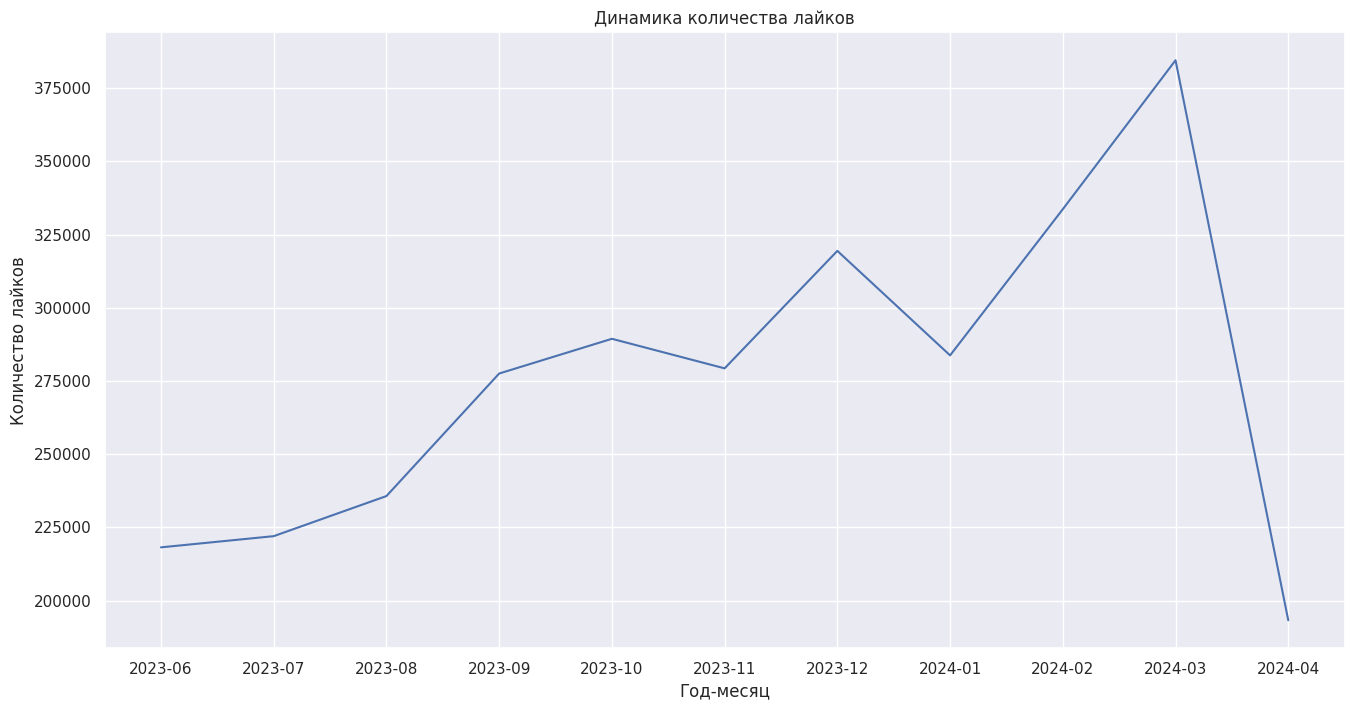

In [ ]:
sns.set(rc={'figure.figsize':(16,8)}) # Размер графика
sns.lineplot(data=likes_per_month, x='Год-месяц', y='Количество лайков').set(title = 'Динамика количества лайков')
# С помощью библиотеки seaborn строим линейный график для анализа динамики лайков по месяцам в течение года, с помощью set даем название графику при помощи title

[Text(0.5, 1.0, 'Динамика количества просмотров')]

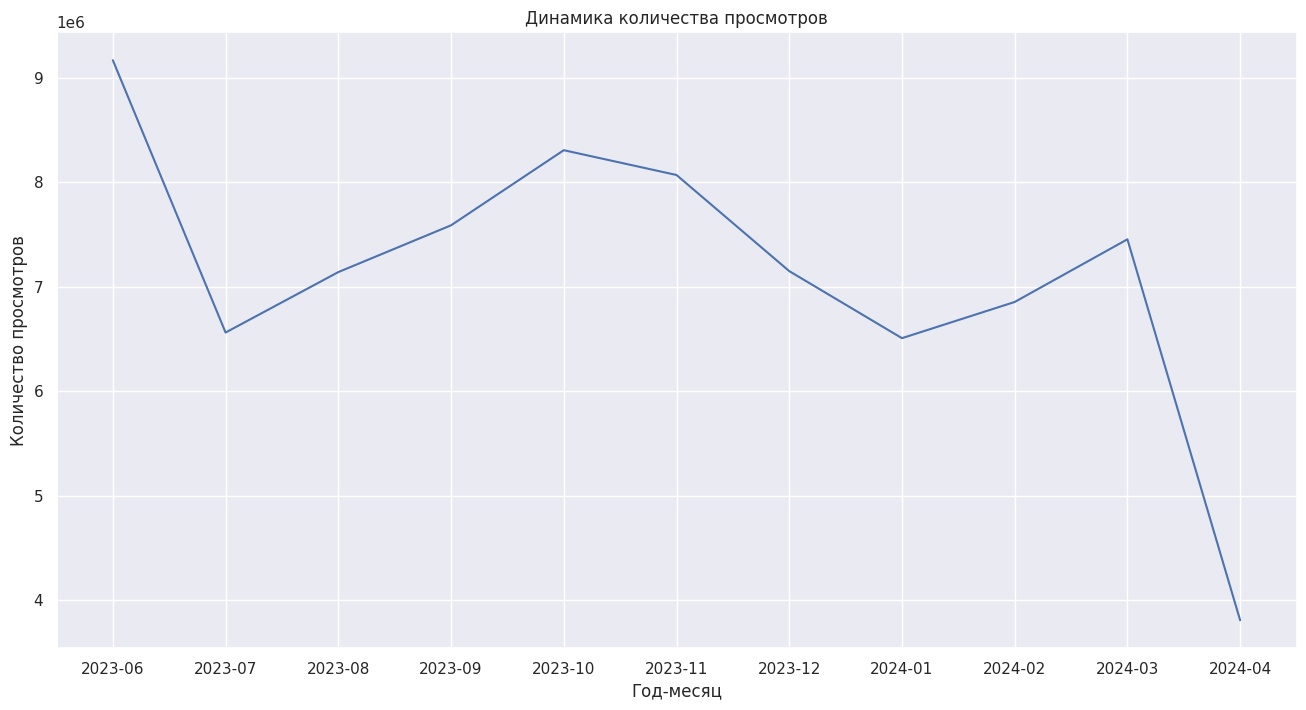

In [ ]:
sns.set(rc={'figure.figsize':(16,8)}) # Размер графика
sns.lineplot(data=views_per_month, x='Год-месяц', y='Количество просмотров').set(title = 'Динамика количества просмотров')
# С помощью библиотеки seaborn строим линейный график для анализа динамики просмотров по месяцам в течение года, с помощью set даем название графику при помощи title

[Text(0.5, 1.0, 'Динамика количества комментариев')]

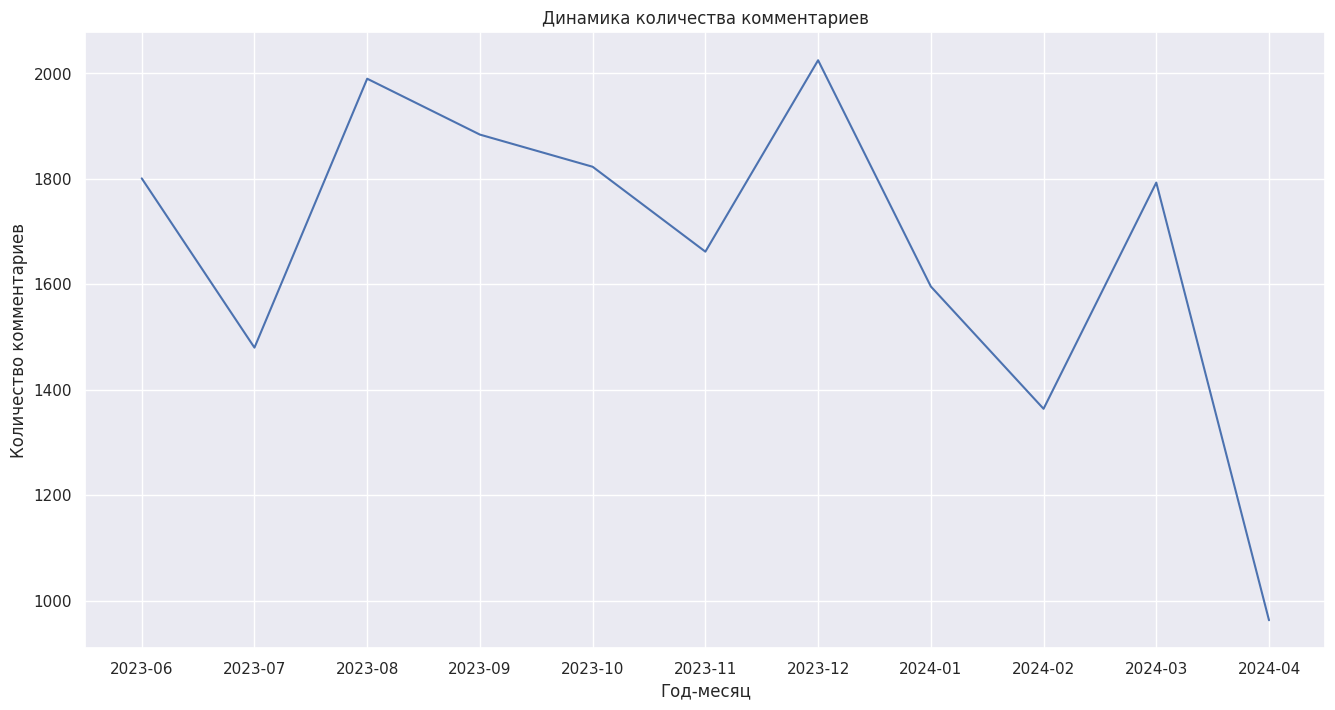

In [ ]:
sns.set(rc={'figure.figsize':(16,8)}) # Размер графика
sns.lineplot(data=comments_per_month, x='Год-месяц', y='Количество комментариев').set(title = 'Динамика количества комментариев')
# С помощью библиотеки seaborn строим линейный график для анализа динамики комментариев по месяцам в течение года, с помощью set даем название графику при помощи title

[Text(0.5, 1.0, 'Динамика количества репостов')]

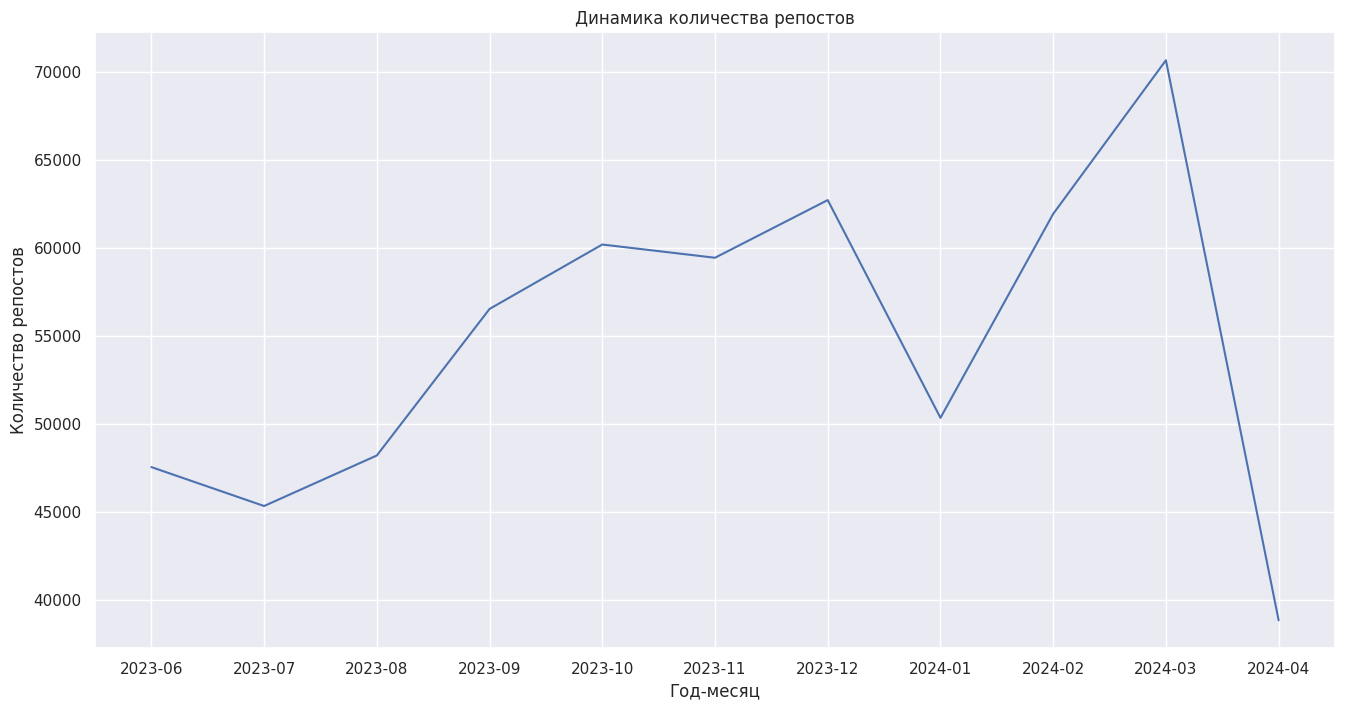

In [ ]:
sns.set(rc={'figure.figsize':(16,8)}) # Размер графика
sns.lineplot(data=reposts_per_month, x='Год-месяц', y='Количество репостов').set(title = 'Динамика количества репостов')
# С помощью библиотеки seaborn строим линейный график для анализа динамики репостов по месяцам в течение года, с помощью set даем название графику при помощи title

У графиков выше заметны колебания, однако можно заметить общую тенденцию: в июле и апреле произошло сильное падение числа просмотров, что скорее всего сказалось и на остальные показатели -  упало число комментариев, репостов. По графикам нельзя точно выделить какой-то опреденный пик популярности группы, однако в марте все показатели увеличились, поэтому март был единственным в течение года месяцем, когда популярность группы выросла.

[Text(0.5, 1.0, 'Динамика количества лайков в зависимости от знака зодиака')]

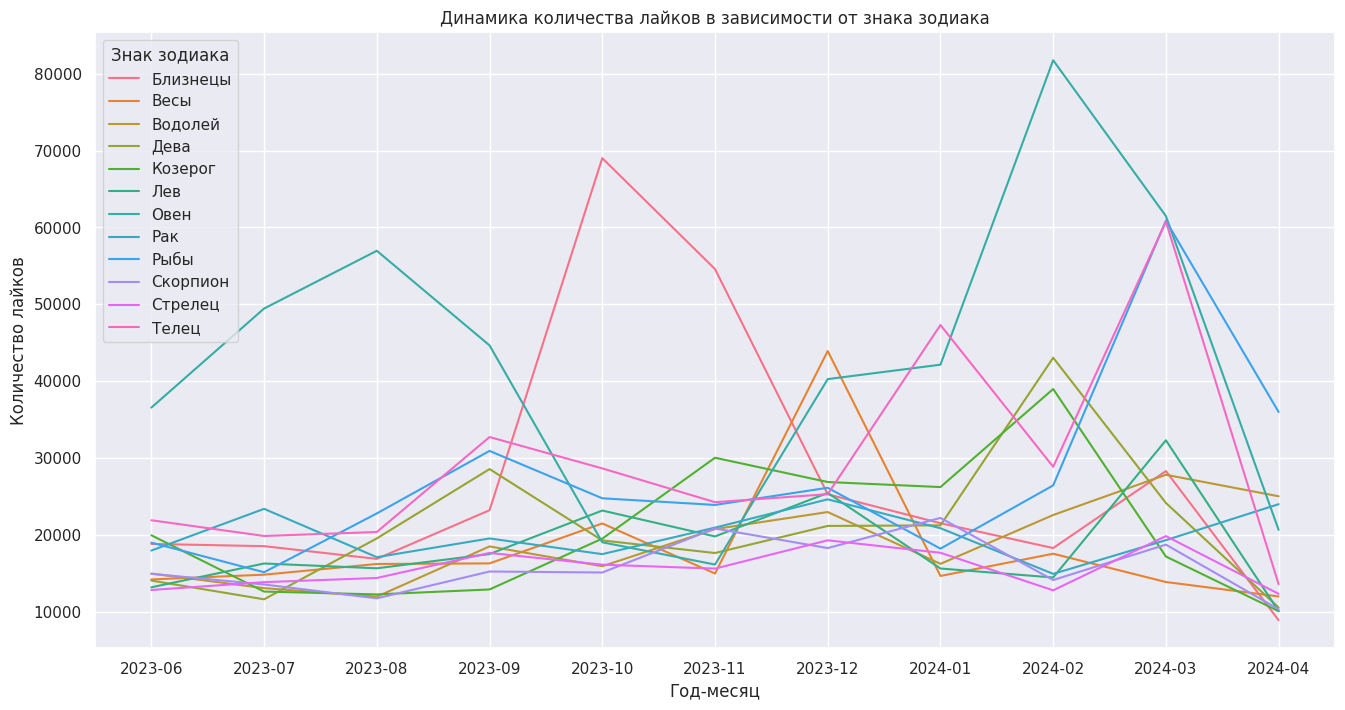

In [ ]:
sns.set(rc={'figure.figsize':(16,8)}) #Размер графика
sns.lineplot(data = zod_likes_pm, x = 'Год-месяц', y = 'Количество лайков', errorbar= None, hue = 'Знак зодиака').set(title = 'Динамика количества лайков в зависимости от знака зодиака')
# Рисуем с помощью библиотеки seaborn линейные графики для анализа динамики числа лайков в зависимости от разных знаков зодиака, повторяем то же, что и в графиках выше, однако с добавлением группирующей переменной hue, которая сгруппирует число лайков и их динамику в зависимости от знака зодиака

По графику динамики числа лайков в зависимости от знака зодиака заметно, что наиболее популярными были знаки зодиака Овен, Близнецы, Рыбы и Телец - в пики их популярности они собирали более 1500 лайков за пост, в то время как остальные знаки едва достигали этой цифры, а некоторые знаки зодиака стабильно получали всего около 500-700 лайков за пост в течение года - это знаки Скорпион и Стрелец.

[Text(0.5, 1.0, 'Динамика количества лайков в зависимости от стихии')]

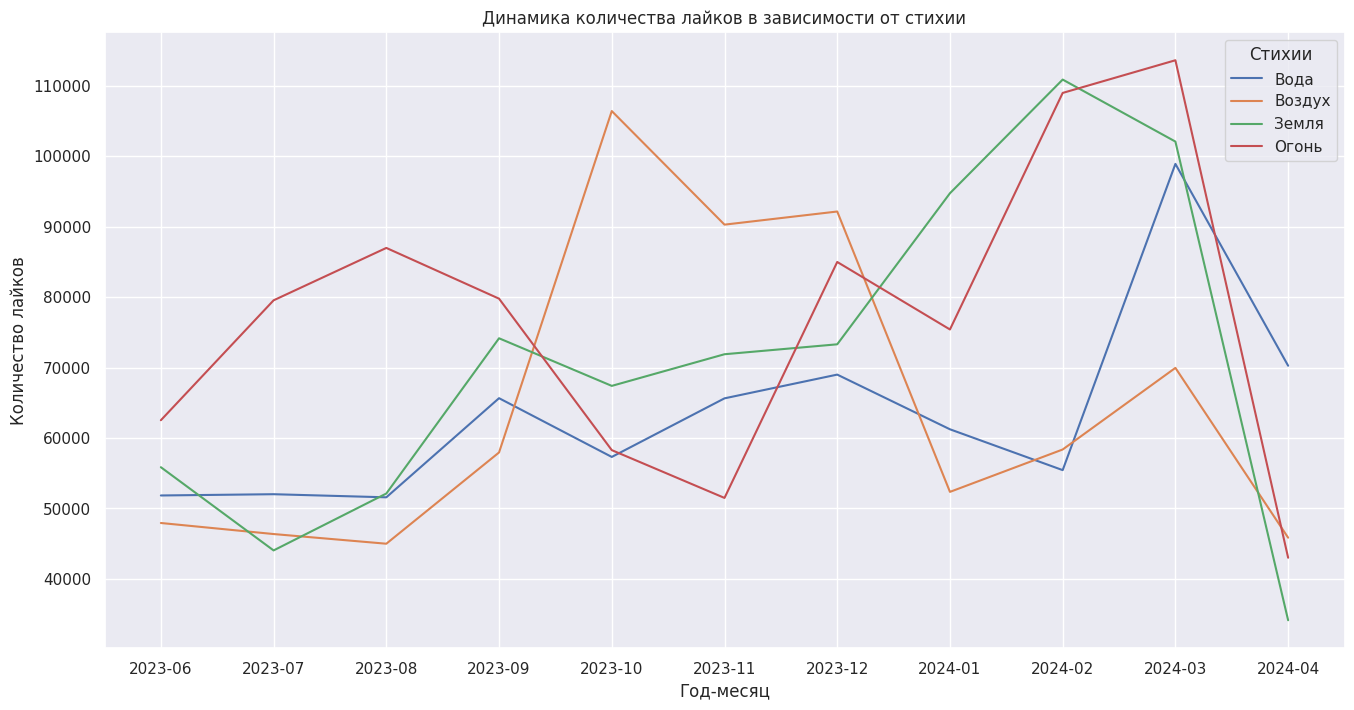

In [ ]:
sns.set(rc={'figure.figsize':(16,8)}) # Размер графика
sns.lineplot(data = stih_likes_pm, x = 'Год-месяц', y = 'Количество лайков', errorbar= None, hue = 'Стихии').set(title = 'Динамика количества лайков в зависимости от стихии')
# Здесь мы также хотим посмотреть динамику лайков, но сгруппированную по стихиям, повторяем код выше с другим столбцом для переменной hue

 По графику динамики числа лайков в зависимости от знаков зодиака заметны колебания популярности этих стихий, однако можно обратить внимание на то, что стихия Воды была преимущественно менее всего популярна в течение года, однако к концу рассматриваемого периода (к апрелю) стала наиболее популярной стихией. Наибольшее число лайков за год получила стихия Земли - она набрала около 1300 лайков в феврале.

Text(0.5, 1, 'Зависимости между количественными показателями в датасете')

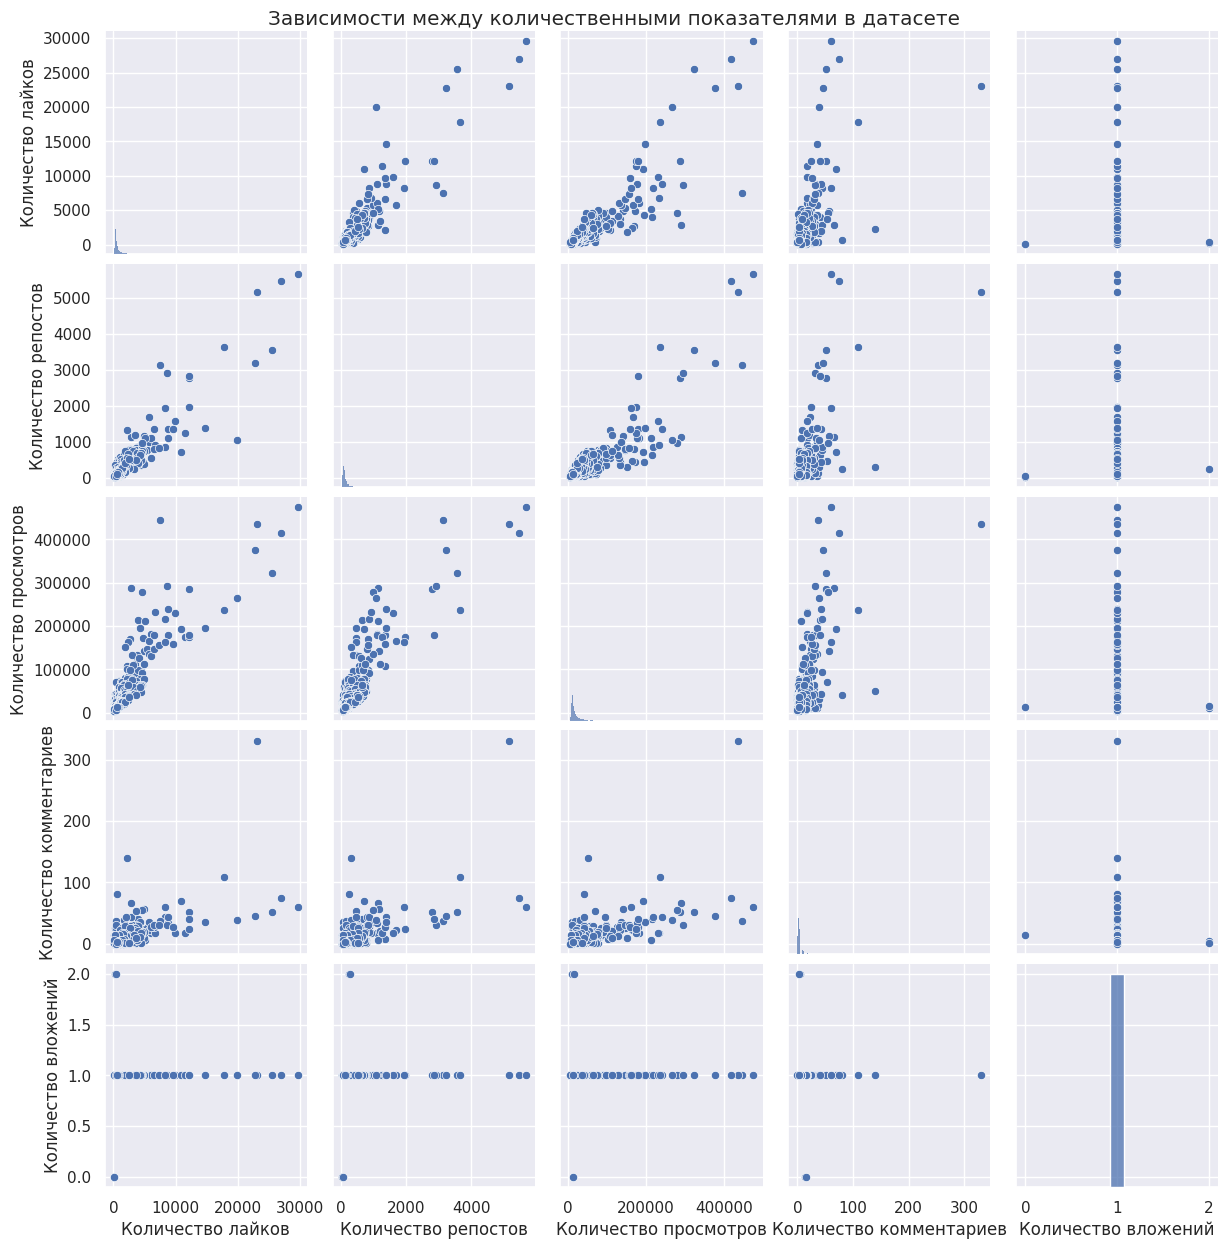

In [ ]:
sns.pairplot(df_2) # строим с помощью seaborn диаграммы рассеяния для отражения взаимосвязей между парами стоблцов данных нашего датасета
plt.suptitle('Зависимости между количественными показателями в датасете', y = 1) #устанавливаем общую для графика подпись с положением 1 по оси у, чтобы подпись не наезжала на графики

По графику выше заметим линейные положительные зависимости между количественными переменными: это связи между числом лайков и числом комментариев, числом просмотров и числом репостов, связи между количеством репостов и количеством комментариев, количеством просмотров, а также количество просмотров связано с количеством комментариев. Корреляционная связь сильная, это заметно по большому скоплению данных. Заметим, что количество вложений не зависит ни от одной другой переменной. Ниже построим интересующие нас в ходе проекта взаимосвязи. Далее выделим отдельные связи из графика выше, которые более всего привлекли наше внимание и заметим, что показатели коррелированны весьма сильно, это видно по тому, как близко точки на графиках расположены к регрессионному уравнению (прямой). Помимо достаточно очевидных связей между лайками, просмотрами и комментариями мы решили продемонстрировать связь между комментариями и репостами, эта связь показалась нам интересной и необычной.

[Text(0.5, 1.0, 'Зависимость числа репостов от числа просмотров')]

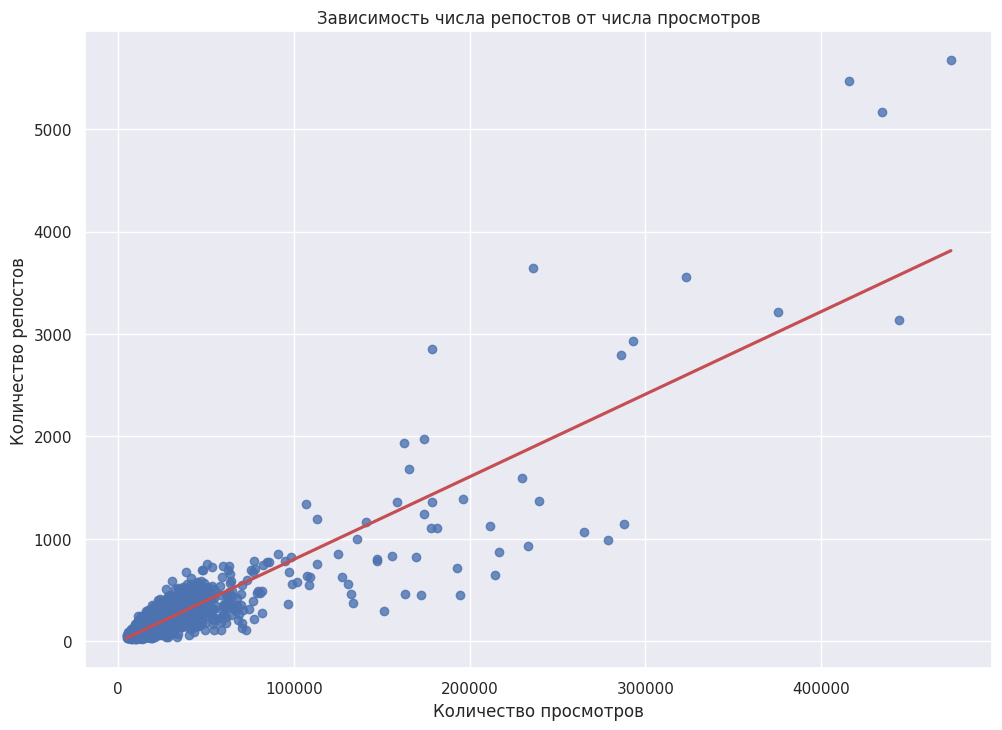

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #Размер графика
sns.regplot(x=df_2["Количество просмотров"], y = df_2["Количество репостов"], line_kws = {'color':'r'}, ci= None).set(title = 'Зависимость числа репостов от числа просмотров') #Построим диаграмму рассеяния для отражения зависимостей между выбранными перменными, а также добавим уравнение регрессии для наглядности

[Text(0.5, 1.0, 'Зависимость числа репостов от числа лайков')]

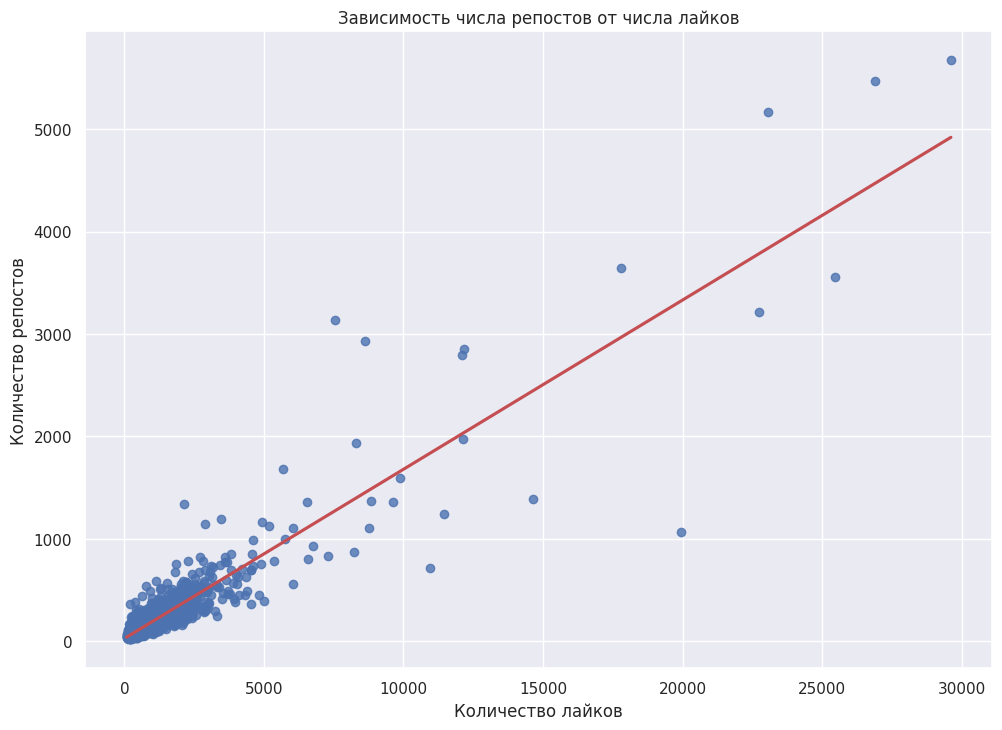

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Размер графика
sns.regplot(x=df_2["Количество лайков"], y = df_2["Количество репостов"], line_kws = {'color':'r'}, ci= None).set(title = 'Зависимость числа репостов от числа лайков') #Построим диаграмму рассеяния для отражения зависимостей между выбранными перменными, а также добавим уравнение регрессии для наглядности

[Text(0.5, 1.0, 'Зависимость числа лайков от числа просмотров')]

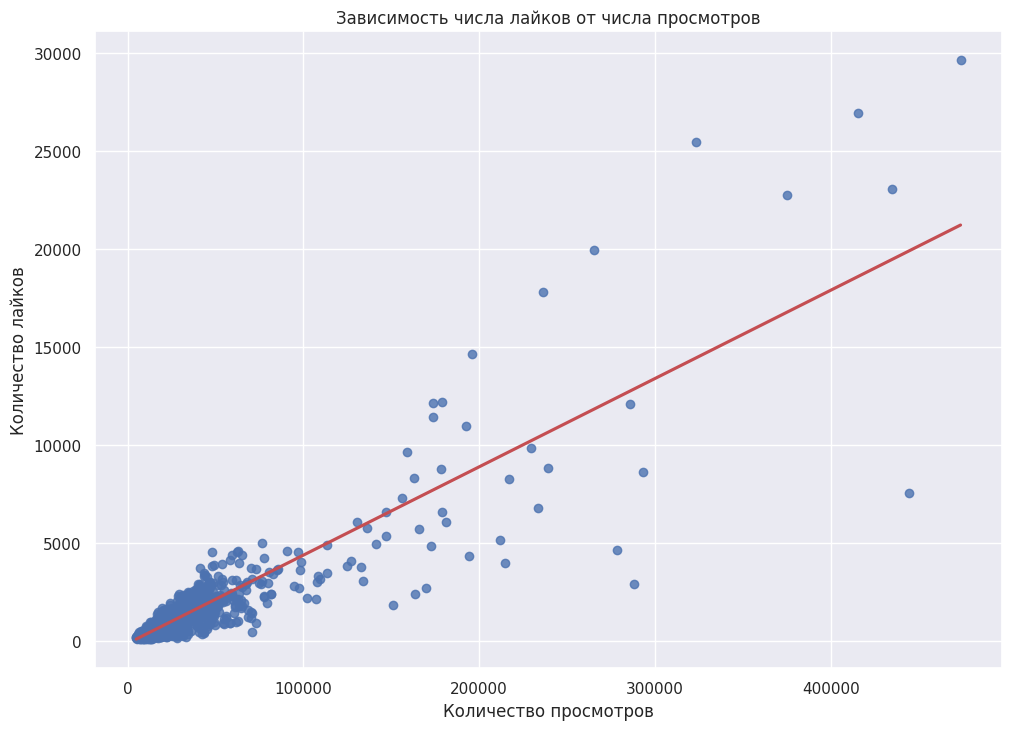

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Размер графика
sns.regplot(x=df_2["Количество просмотров"], y = df_2["Количество лайков"], line_kws = {'color':'r'}, ci= None).set(title = 'Зависимость числа лайков от числа просмотров') #Построим диаграмму рассеяния для отражения зависимостей между выбранными перменными, а также добавим уравнение регрессии для наглядности

[Text(0.5, 1.0, 'Зависимость числа комментариев от числа просмотров')]

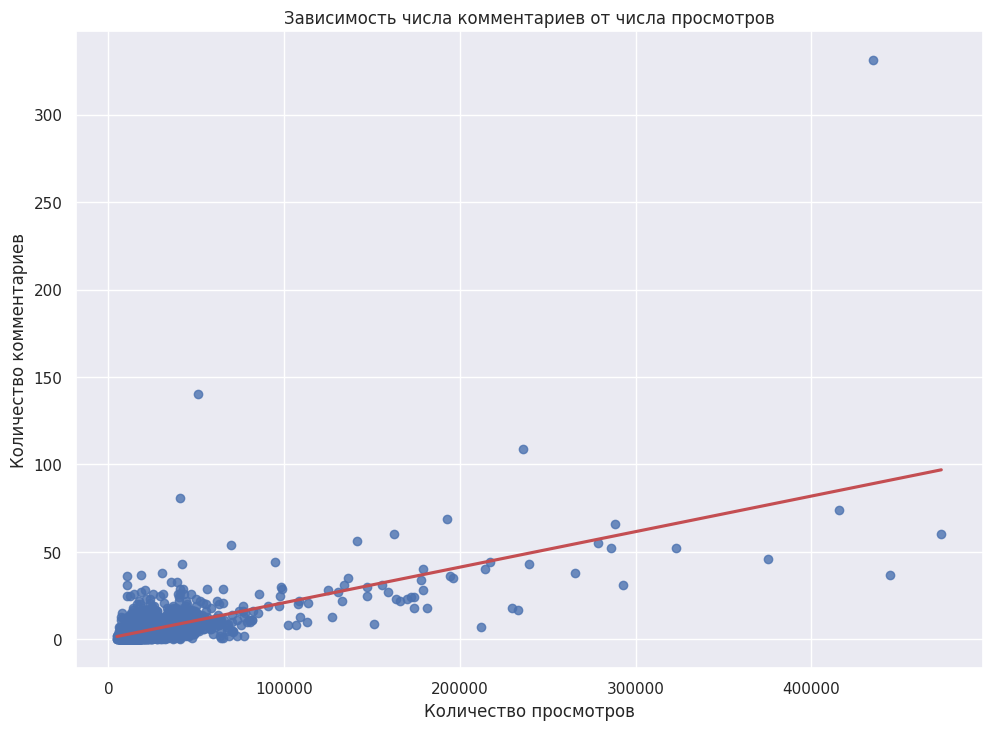

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Размер графика
sns.regplot(x=df_2["Количество просмотров"], y = df_2["Количество комментариев"], line_kws = {'color':'r'}, ci= None).set(title = 'Зависимость числа комментариев от числа просмотров') #Построим диаграмму рассеяния для отражения зависимостей между выбранными перменными, а также добавим уравнение регрессии для наглядности

[Text(0.5, 1.0, 'Зависимость числа комментариев от числа лайков')]

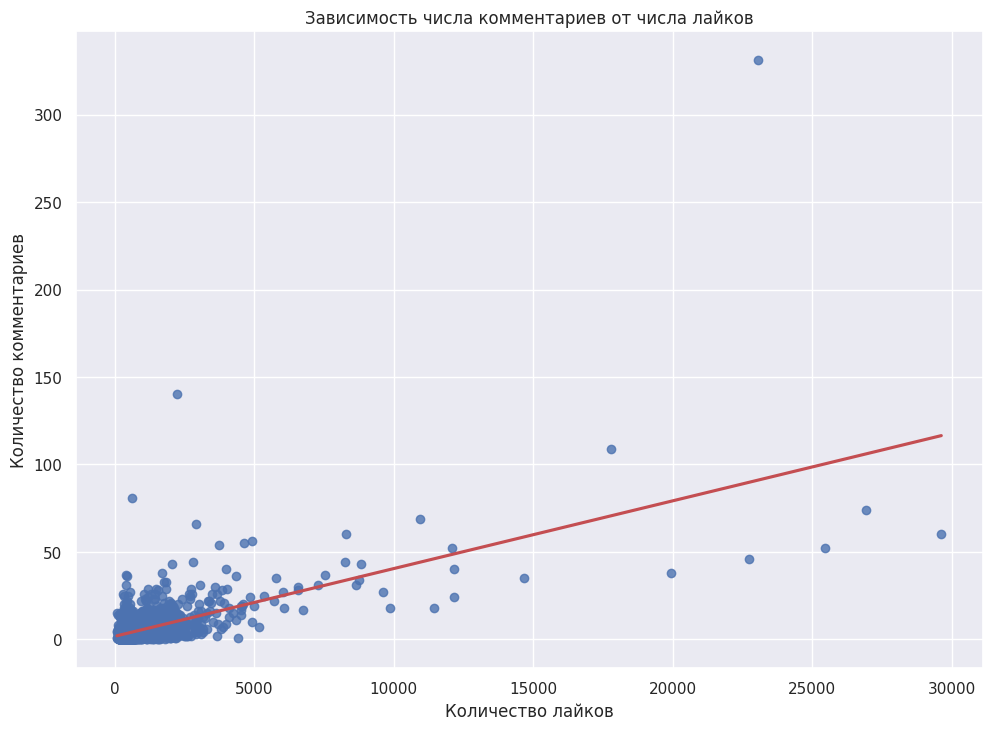

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Размер графика
sns.regplot(x=df_2["Количество лайков"], y = df_2["Количество комментариев"], line_kws = {'color':'r'}, ci= None).set(title = 'Зависимость числа комментариев от числа лайков') #Построим диаграмму рассеяния для отражения зависимостей между выбранными перменными, а также добавим уравнение регрессии для наглядности

[Text(0.5, 1.0, 'Зависимость числа комментариев от числа репостов')]

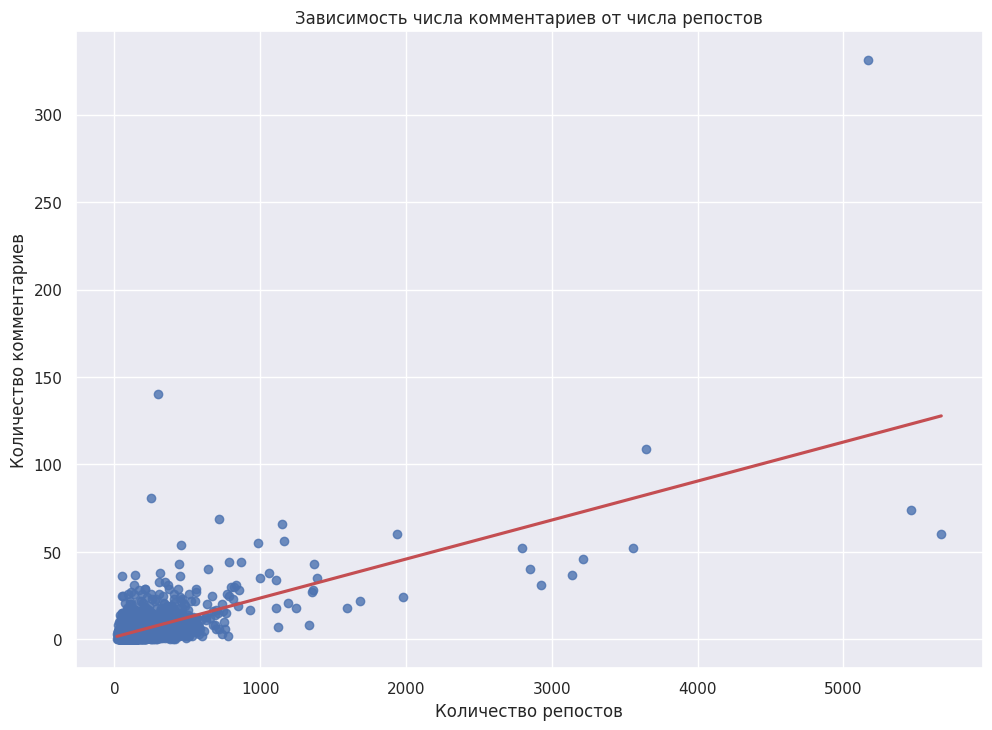

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Размер графика
sns.regplot(x=df_2["Количество репостов"], y = df_2["Количество комментариев"], line_kws = {'color':'r'}, ci= None).set(title = 'Зависимость числа комментариев от числа репостов') #Построим диаграмму рассеяния для отражения зависимостей между выбранными перменными, а также добавим уравнение регрессии для наглядности

[Text(0.5, 1.0, 'Распределение числа лайков по знакам зодиака')]

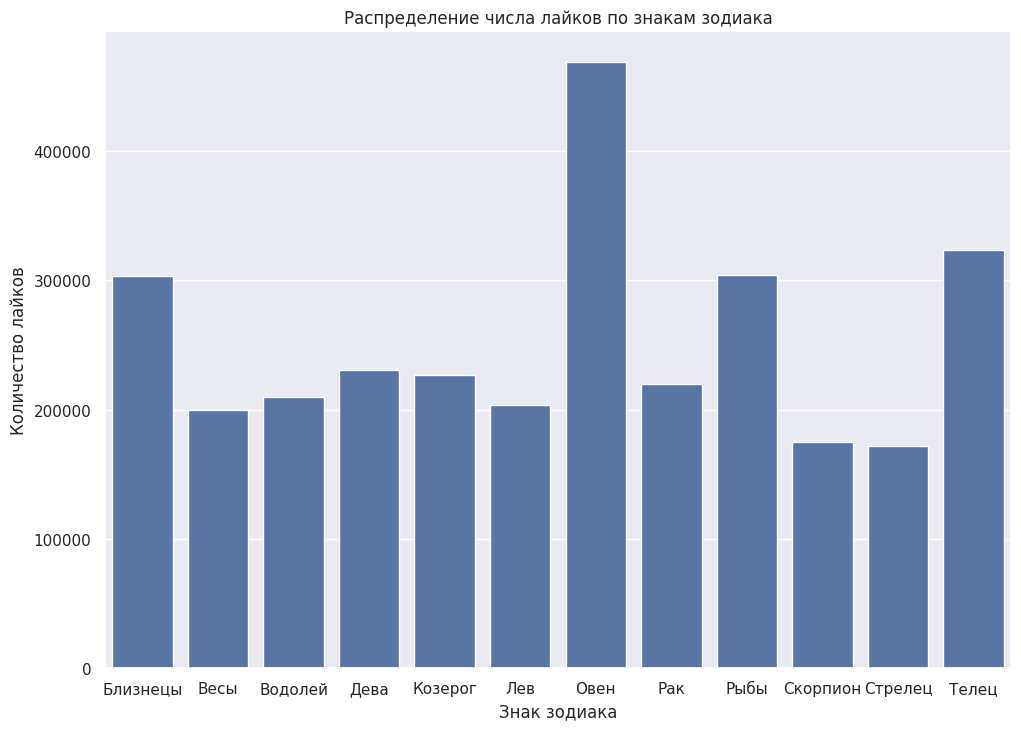

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #размер графика
sns.barplot(data = likes_per_zodiac, x='Знак зодиака', y = 'Количество лайков').set(title = 'Распределение числа лайков по знакам зодиака') # рисуем стобчатую диаграмму, строим по тому же принципу, что и остальные графики, датасет берем новый

[Text(0.5, 1.0, 'Распределение числа лайков по стихиям')]

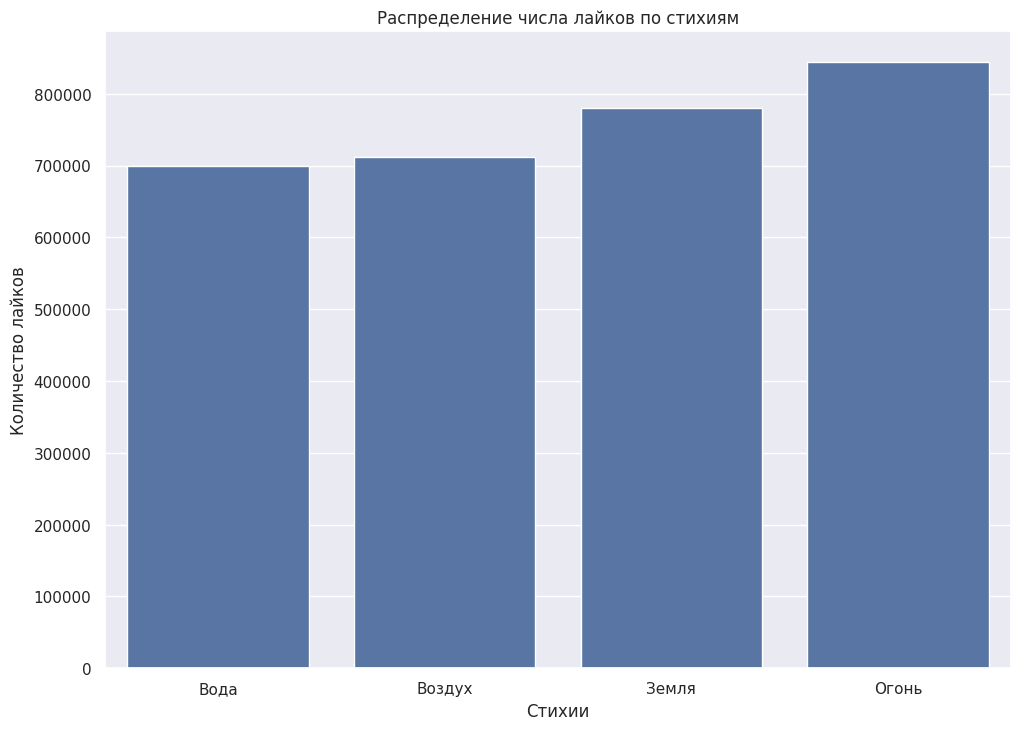

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Размер графика
sns.barplot(data = likes_per_stihii, x='Стихии', y = 'Количество лайков').set(title = 'Распределение числа лайков по стихиям') # рисуем стобчатую диаграмму, строим по тому же принципу, что и остальные графики, датасет берем новый

[Text(0.5, 1.0, 'Распределение числа комментариев по знакам зодиака')]

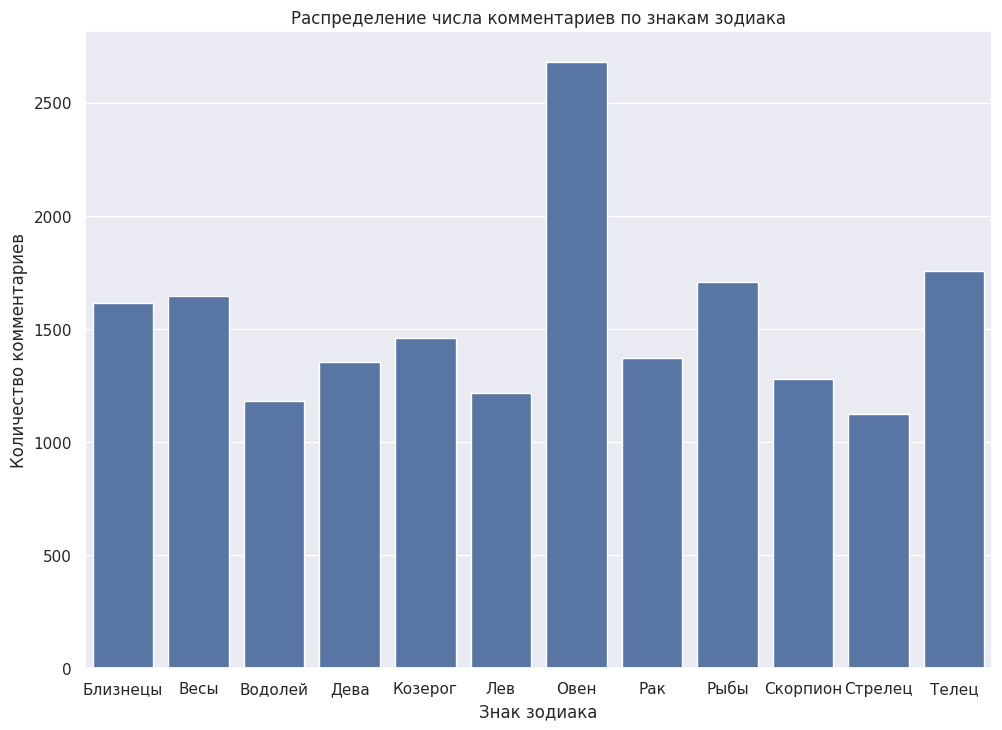

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #размер графика
sns.barplot(data = comments_per_zodiac, x='Знак зодиака', y = 'Количество комментариев').set(title = 'Распределение числа комментариев по знакам зодиака') # рисуем стобчатую диаграмму, строим по тому же принципу, что и остальные графики, датасет берем новый

[Text(0.5, 1.0, 'Распределение числа комментариев по стихиям')]

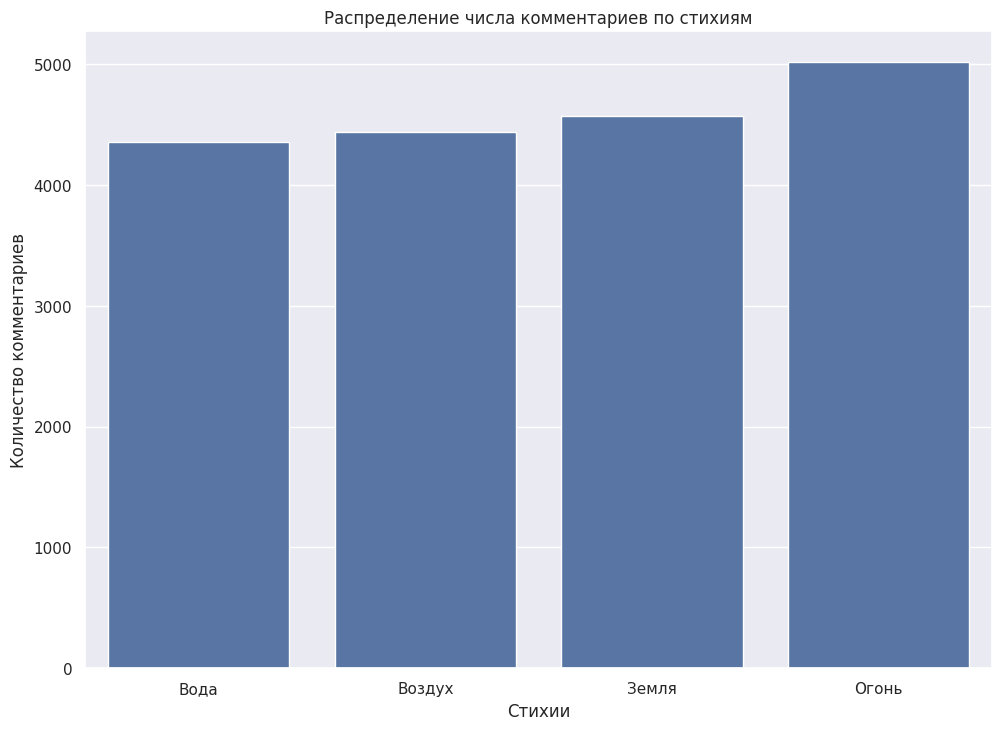

In [ ]:
 sns.set(rc={'figure.figsize':(11.7,8.27)}) # Размер графика
sns.barplot(data = comments_per_stihii, x='Стихии', y = 'Количество комментариев').set(title = 'Распределение числа комментариев по стихиям') # рисуем стобчатую диаграмму, строим по тому же принципу, что и остальные графики, датасет берем новый

Более всего лайков и комментариев получают посты о знаках зодиака, принадлежащих к стихии Огонь, остальные знаки получают малоотличающиеся количества лайков и комментариев. При этом, более всего лайков и комментариев из знаков зодиака получает знак Овен, который как раз принадлежит к стихии Огонь. Также много лайков и комментариев относятся к постам про знаки Телец, Близнецы и Рыбы, а также заметна особенность - знак Весы также часто комментируют, при этом лайкают его реже, чем большинство знаков.

# Формулирование гипотез


Примеры наших гипотез на данном этапе:
1. Тенденция популярности овнов сохранится;
2. Cтихия огонь останется самой популярно;
3. Овнов больше всего любят/в группе больше овнов из-за количества лайков;
4. Через 2-3 месяца в группе будет больше просмотров, чем сейчас;
5. В нерабоччие дни отклик на посты( лайки, комменты и репосты) выше, чем в рабочие.
